In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving STORY 1.jpg to STORY 1.jpg
User uploaded file "STORY 1.jpg" with length 749968 bytes


#Glass

Data set Glass adalah data yang digunakan untuk menganalisis data dari jenis kimia

Ada bebrapa deskripsi data yang digunaka oleh data set ini yaitu data
1. RI: refractive index
2. Na: Sodium
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type





# File import
dataset:
https://www.kaggle.com/datasets/uciml/glass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

Memasukan data yang di download

In [2]:
glass = pd.read_csv('glass.csv')

# Mendapat Info Dataset

Setelah di import kita akan mencoba explore dataset untuk mencari informasinya

In [3]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [6]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Mencari informasi statistik

In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass.shape

(214, 10)

In [11]:
glass.size

2140

In [12]:
glass.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


In [13]:
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [14]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [15]:
glass.memory_usage()

Index     128
RI       1712
Na       1712
Mg       1712
Al       1712
Si       1712
K        1712
Ca       1712
Ba       1712
Fe       1712
Type     1712
dtype: int64

In [16]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [17]:
print(glass["Type"].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [18]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


# Memvisualisasikan data

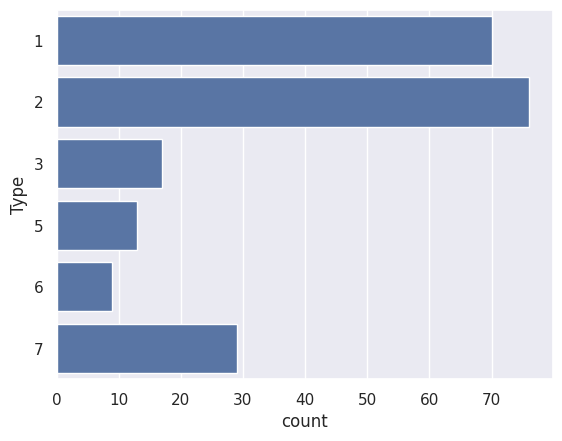

In [21]:
sns.countplot(y='Type', data=glass, )
plt.show()

Insight:

data spesies bunga memiliki rata rata sama (50 data tiap spesies)




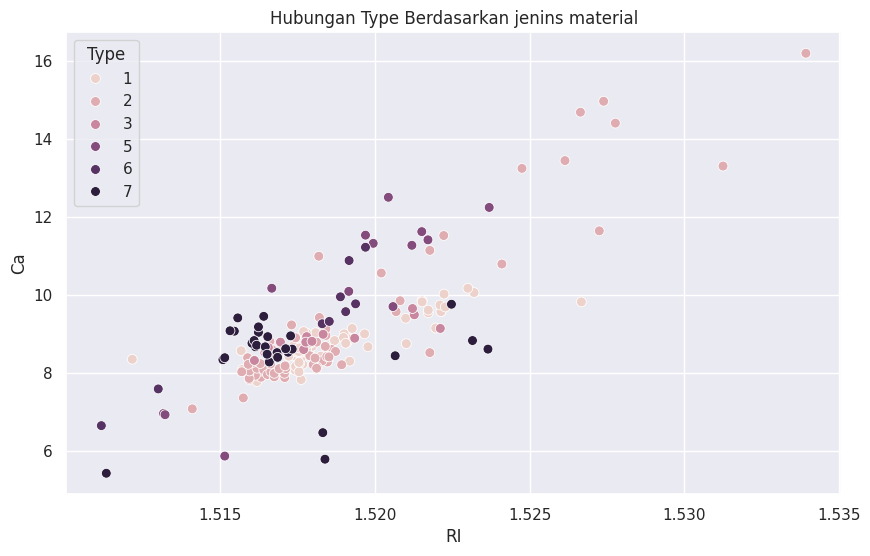

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Hubungan Type Berdasarkan jenins material')
sns.scatterplot(x='RI', y='Ca', hue='Type', data=glass, s=50)
plt.show()

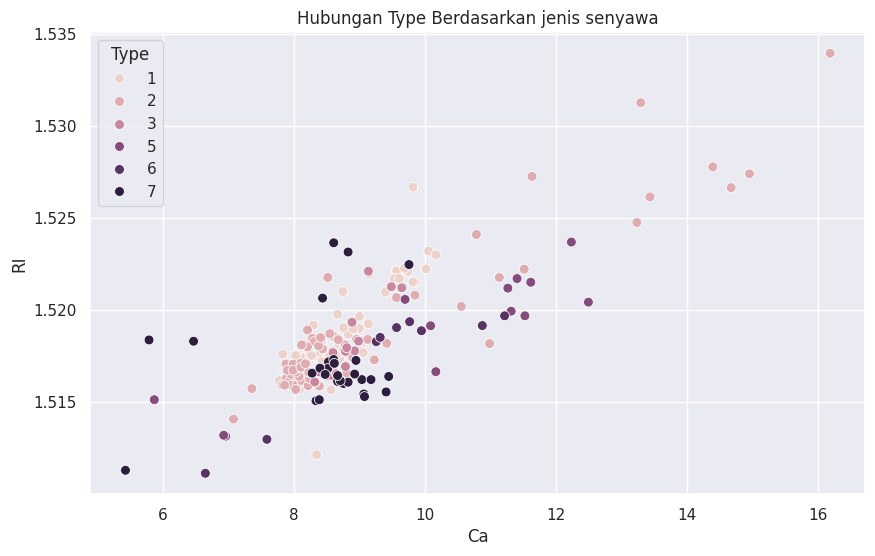

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Hubungan Type Berdasarkan jenis senyawa')
sns.scatterplot(x='Ca', y='RI', hue='Type', data=glass, s=50)
plt.show()

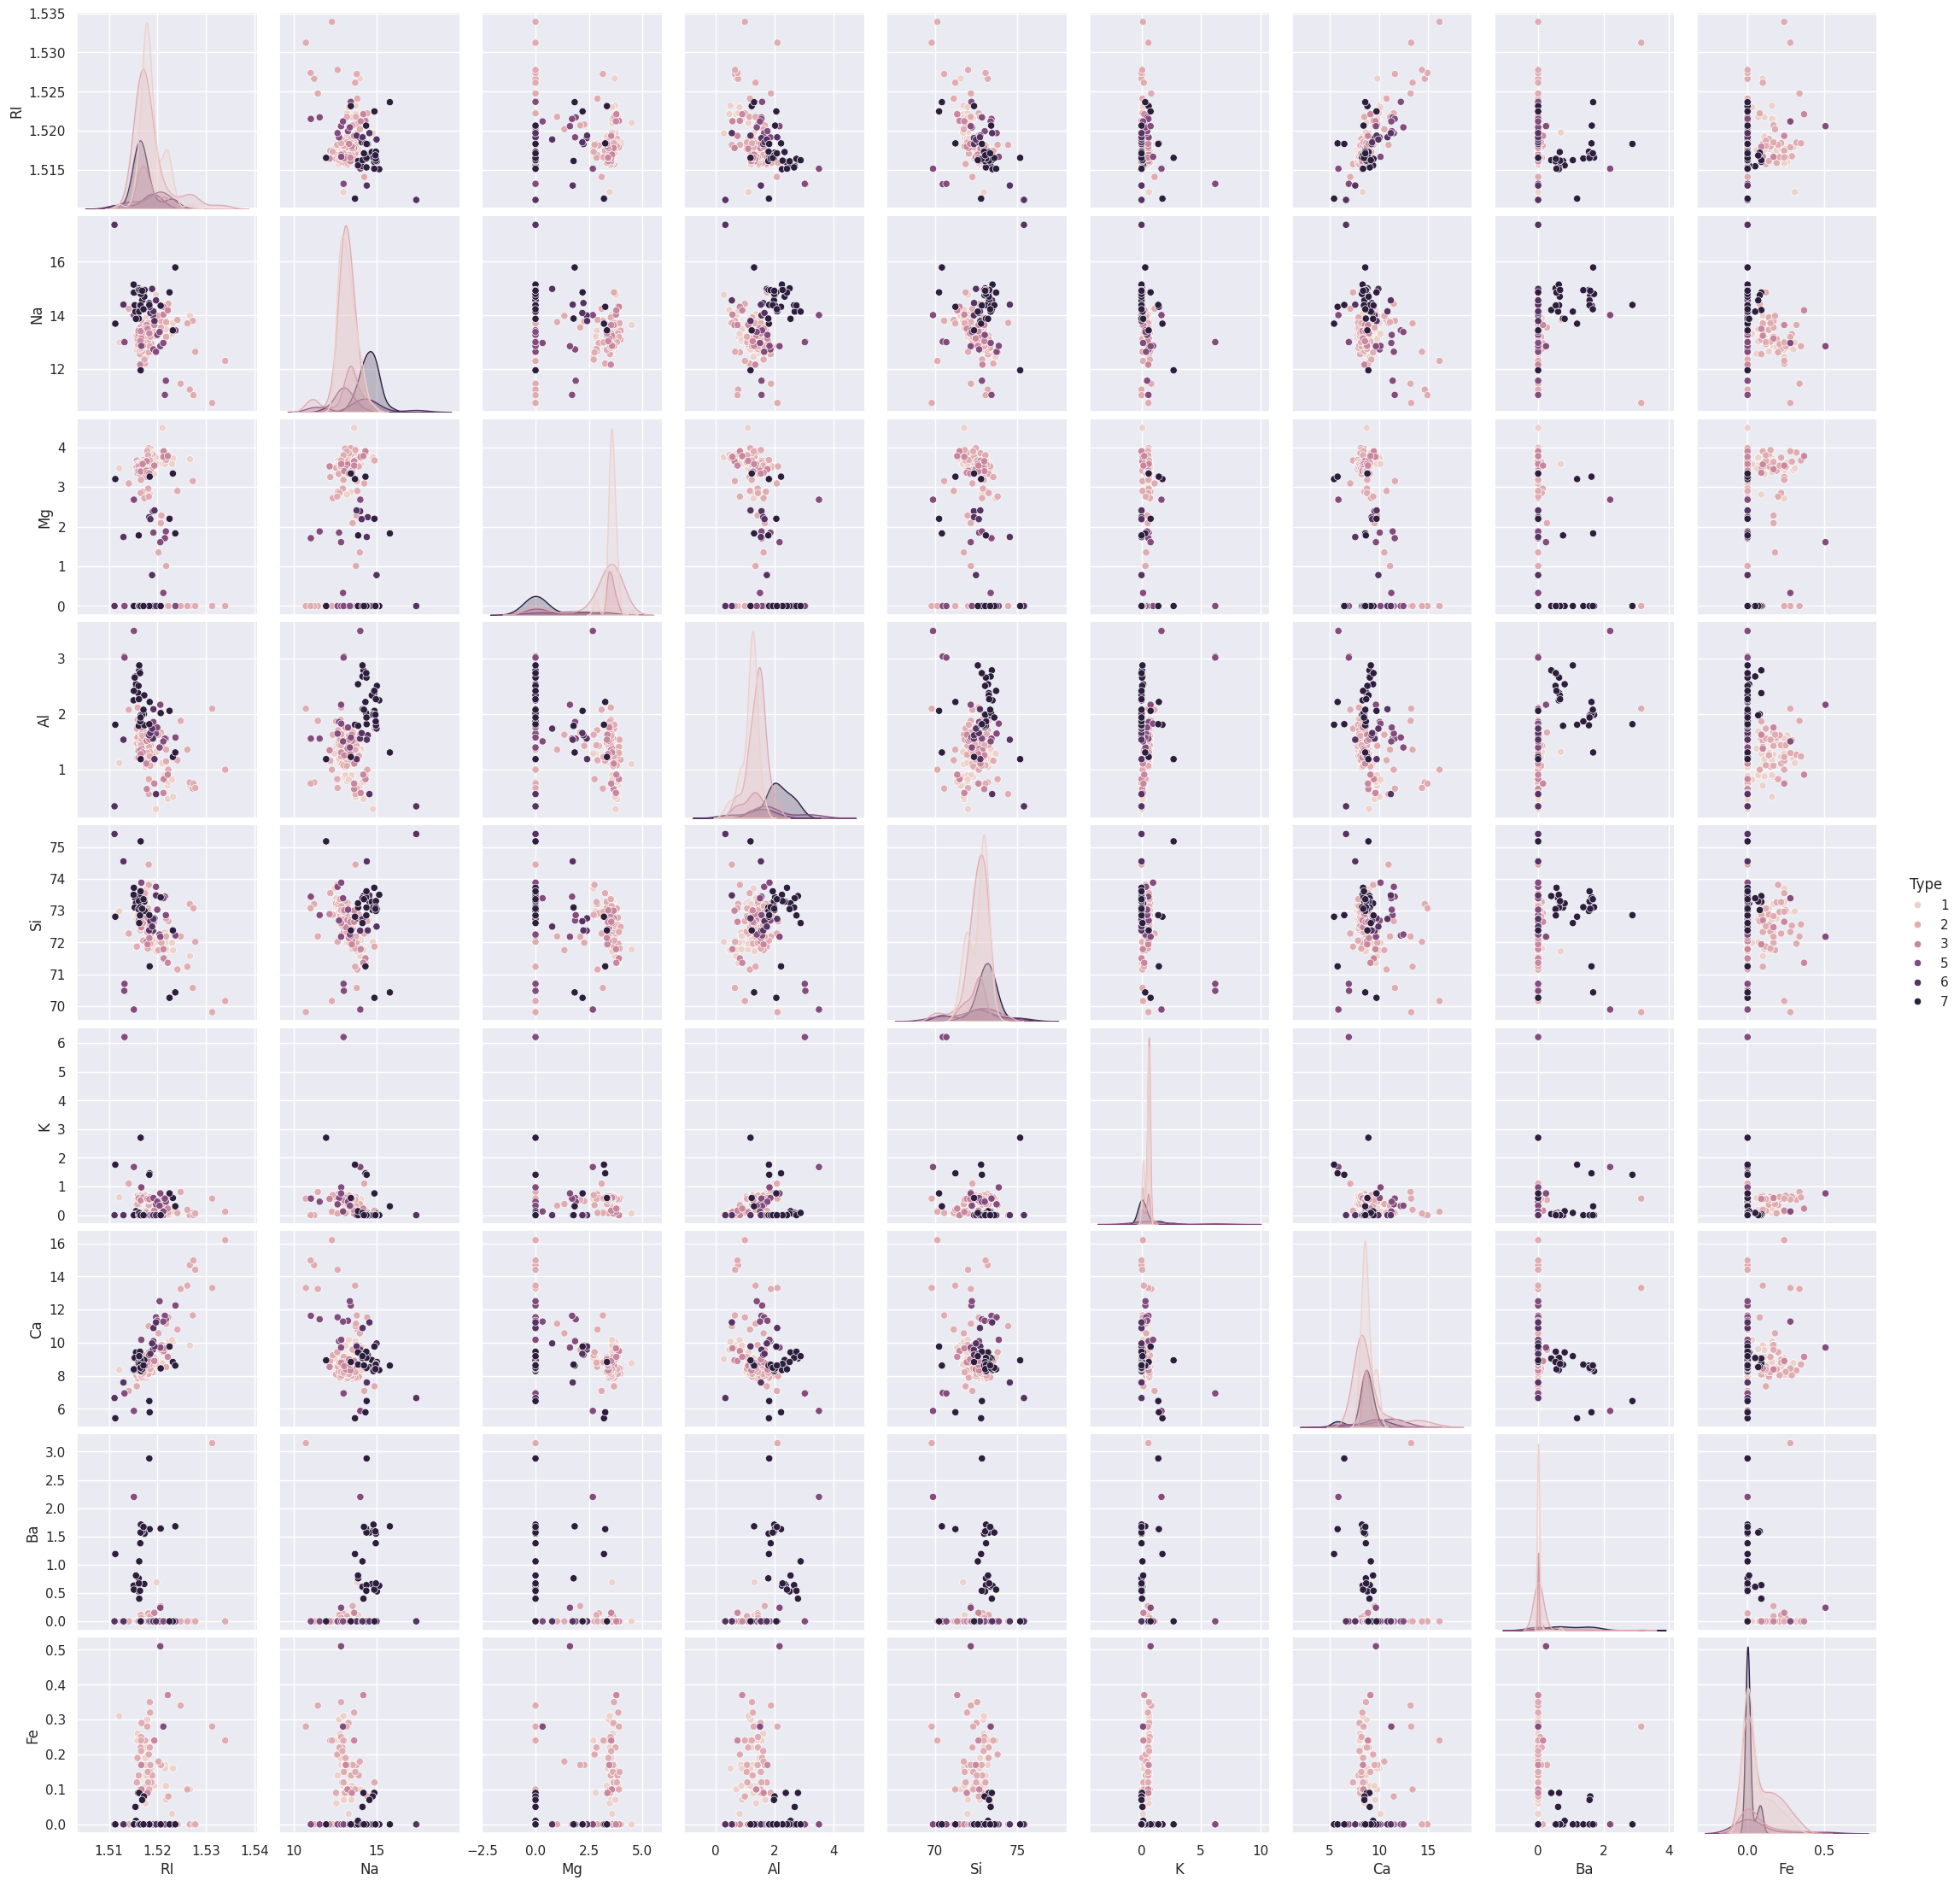

In [26]:
sns.pairplot(glass,hue='Type')

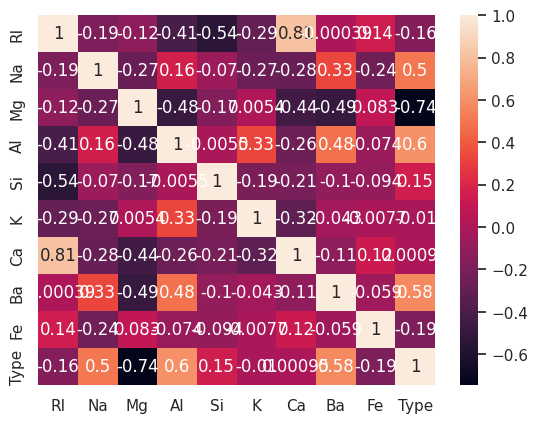

In [27]:
corr_matrix = glass.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
glass.groupby('Type').agg(['mean', 'median'])

RI                   Na                Mg               Al         \
          mean    median       mean  median      mean median      mean median   
Type                                                                            
1     1.518718  1.517835  13.242286  13.195  3.552429  3.565  1.163857   1.23   
2     1.518619  1.517100  13.111711  13.155  3.002105  3.520  1.408158   1.46   
3     1.517964  1.517690  13.437059  13.420  3.543529  3.530  1.201176   1.28   
5     1.518928  1.519940  12.827692  12.970  0.773846  0.000  2.033846   1.76   
6     1.517456  1.518880  14.646667  14.400  1.305556  1.740  1.366667   1.56   
7     1.517116  1.516510  14.442069  14.390  0.538276  0.000  2.122759   2.06   

             Si                 K                Ca                Ba         \
           mean  median      mean median       mean  median      mean median   
Type                                                                           
1     72.619143  72.815  0.447429   0.56   8.797286   8.675  0.012714   0.00   
2     72.598026  72.735  0.521053   0.58   9.073684   8.275  0.050263   0.00   
3     72.404706  72.640  0.406471   0.56   8.782941   8.790  0.008824   0.00   
5     72.366154  72.690  1.470000   0.58  10.123846  11.270  0.187692   0.00   
6     73.206667  72.740  0.000000   0.00   9.356667   9.570  0.000000   0.00   
7     72.965862  73.110  0.325172   0.00   8.491379   8.670  1.040000   0.81   

            Fe         
          mean median  
Type                   
1     0.057000    0.0  
2     0.079737    0.0  
3     0.057059    0.0  
5     0.060769    0.0  
6     0.000000    0.0  
7     0.013448    0.0

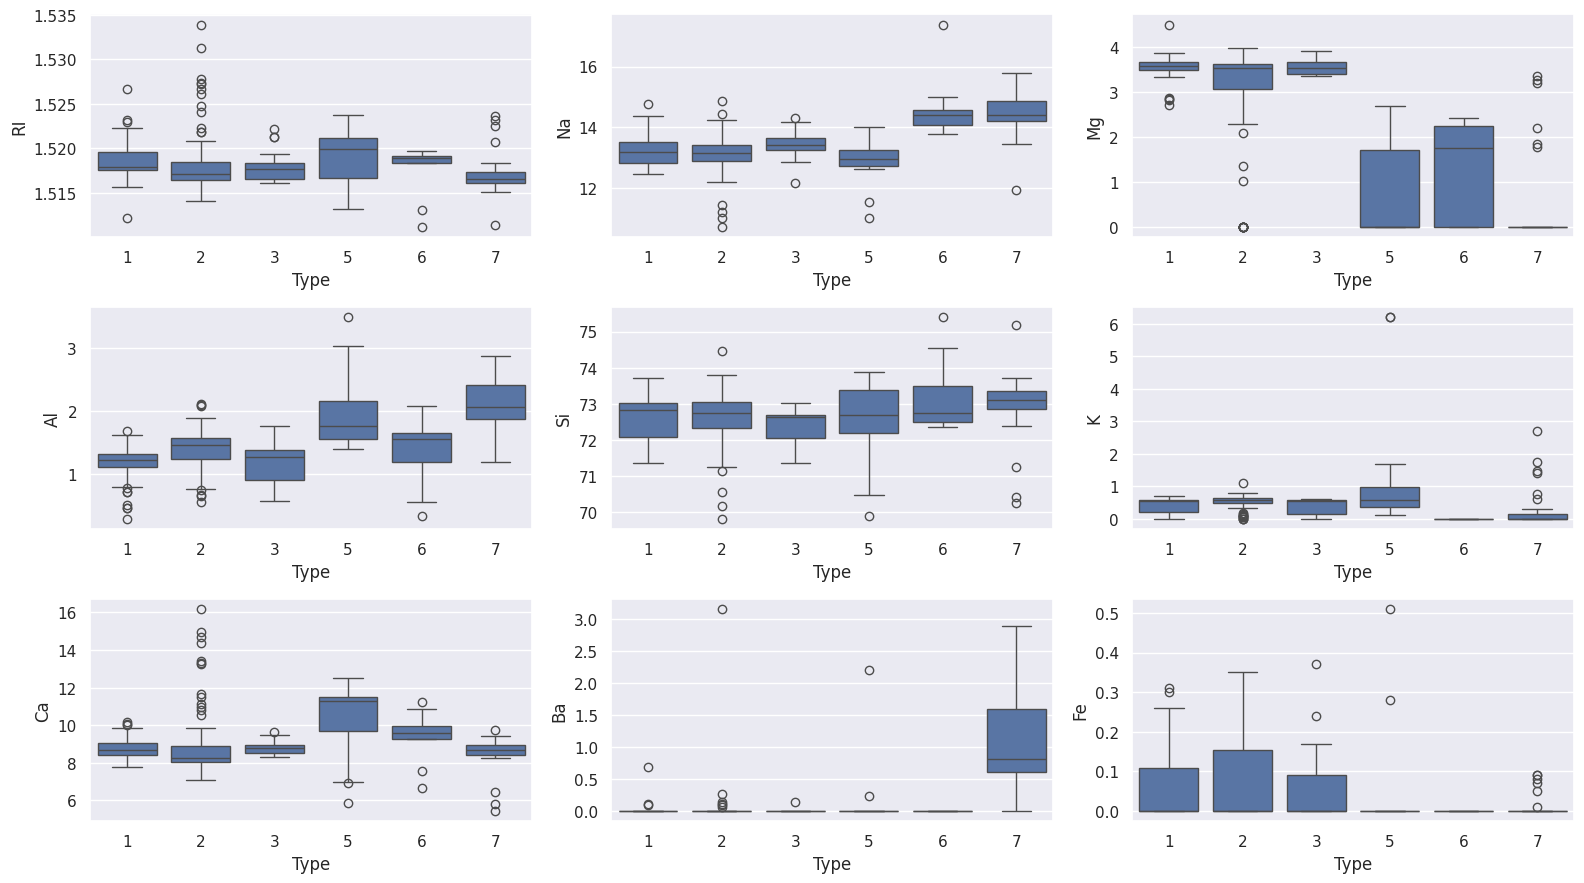

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))
sns.boxplot(y="RI", x="Type", data=glass, orient='v', ax=axes[0, 0])
sns.boxplot(y="Na", x="Type", data=glass, orient='v', ax=axes[0, 1])
sns.boxplot(y="Mg", x="Type", data=glass, orient='v', ax=axes[0, 2])
sns.boxplot(y="Al", x="Type", data=glass, orient='v', ax=axes[1, 0])
sns.boxplot(y="Si", x="Type", data=glass, orient='v', ax=axes[1, 1])
sns.boxplot(y="K", x="Type", data=glass, orient='v', ax=axes[1, 2])
sns.boxplot(y="Ca", x="Type", data=glass, orient='v', ax=axes[2, 0])
sns.boxplot(y="Ba", x="Type", data=glass, orient='v', ax=axes[2, 1])
sns.boxplot(y="Fe", x="Type", data=glass, orient='v', ax=axes[2, 2])

plt.tight_layout()
plt.show()

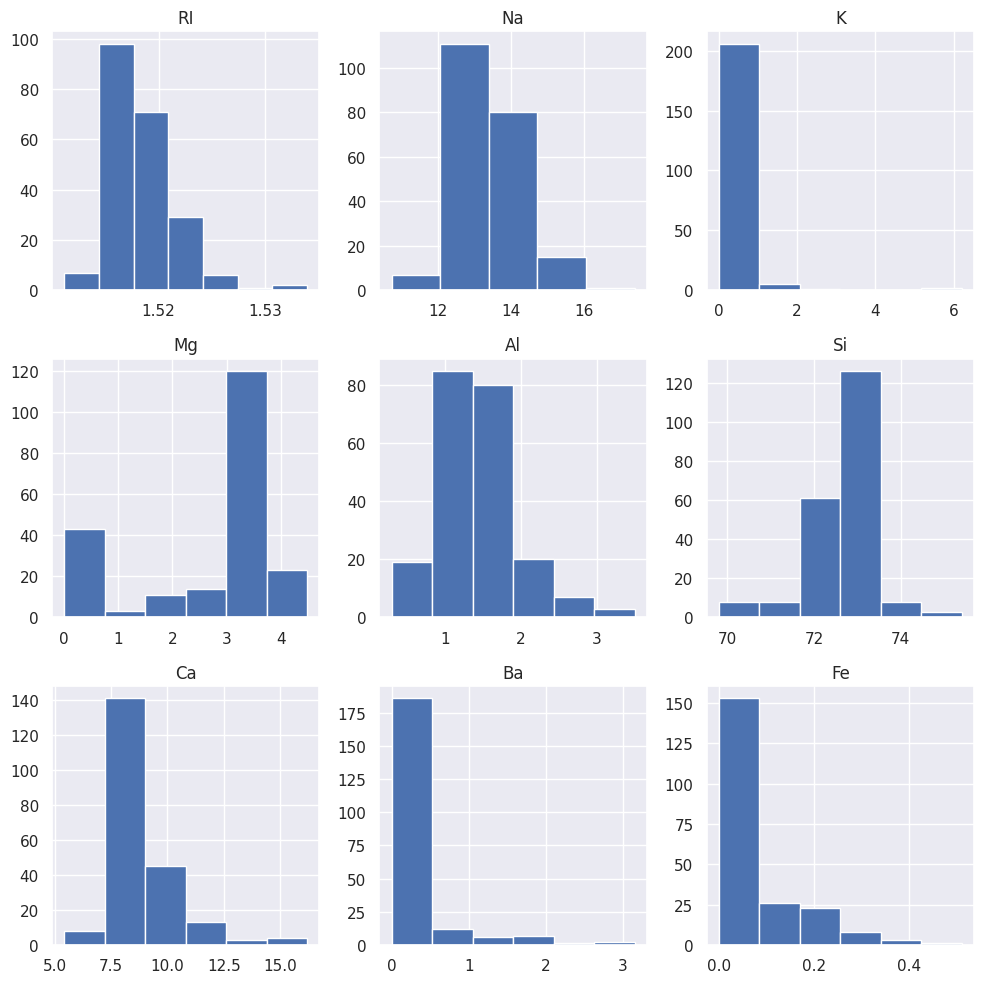

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes[0, 0].set_title("RI")
axes[0, 0].hist(glass['RI'], bins=7)

axes[0, 1].set_title("Na")
axes[0, 1].hist(glass['Na'], bins=5)

axes[1, 0].set_title("Mg")
axes[1, 0].hist(glass['Mg'], bins=6)

axes[1, 1].set_title("Al")
axes[1, 1].hist(glass['Al'], bins=6)

axes[1, 2].set_title("Si")
axes[1, 2].hist(glass['Si'], bins=6)

axes[0, 2].set_title("K")
axes[0, 2].hist(glass['K'], bins=6)

axes[2, 0].set_title("Ca")
axes[2, 0].hist(glass['Ca'], bins=6)

axes[2, 1].set_title("Ba")
axes[2, 1].hist(glass['Ba'], bins=6)

axes[2, 2].set_title("Fe")
axes[2, 2].hist(glass['Fe'], bins=6)

plt.tight_layout()
plt.show()

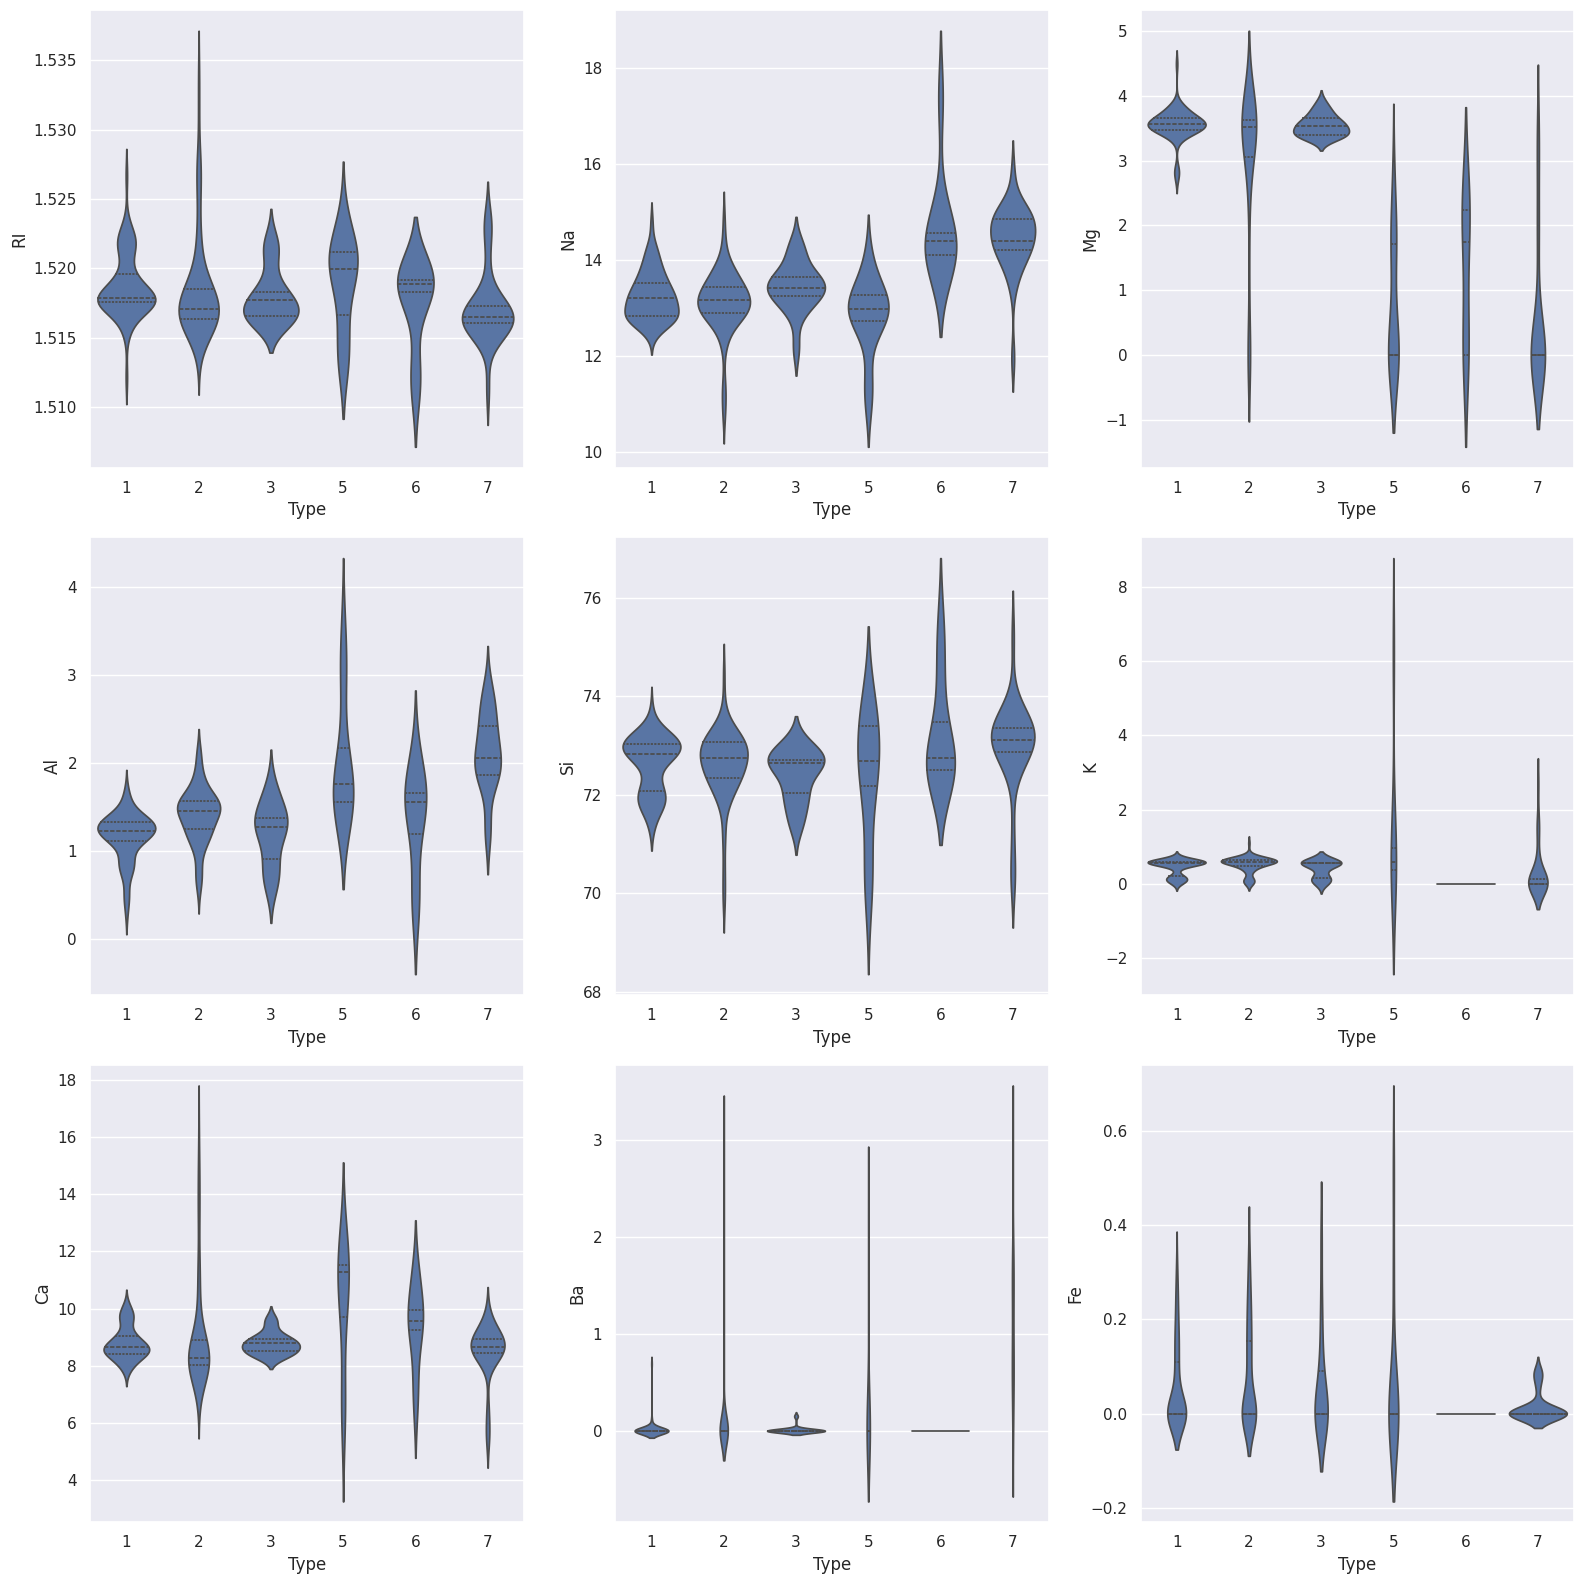

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

sns.violinplot(y="RI", x="Type", data=glass, orient='v', ax=axes[0, 0], inner='quartile')
sns.violinplot(y="Na", x="Type", data=glass, orient='v', ax=axes[0, 1], inner='quartile')
sns.violinplot(y="Mg", x="Type", data=glass, orient='v', ax=axes[0, 2], inner='quartile')
sns.violinplot(y="Al", x="Type", data=glass, orient='v', ax=axes[1, 0], inner='quartile')
sns.violinplot(y="Si", x="Type", data=glass, orient='v', ax=axes[1, 1], inner='quartile')
sns.violinplot(y="K", x="Type", data=glass, orient='v', ax=axes[1, 2], inner='quartile')
sns.violinplot(y="Ca", x="Type", data=glass, orient='v', ax=axes[2, 0], inner='quartile')
sns.violinplot(y="Ba", x="Type", data=glass, orient='v', ax=axes[2, 1], inner='quartile')
sns.violinplot(y="Fe", x="Type", data=glass, orient='v', ax=axes[2, 2], inner='quartile')

plt.tight_layout()
plt.show()

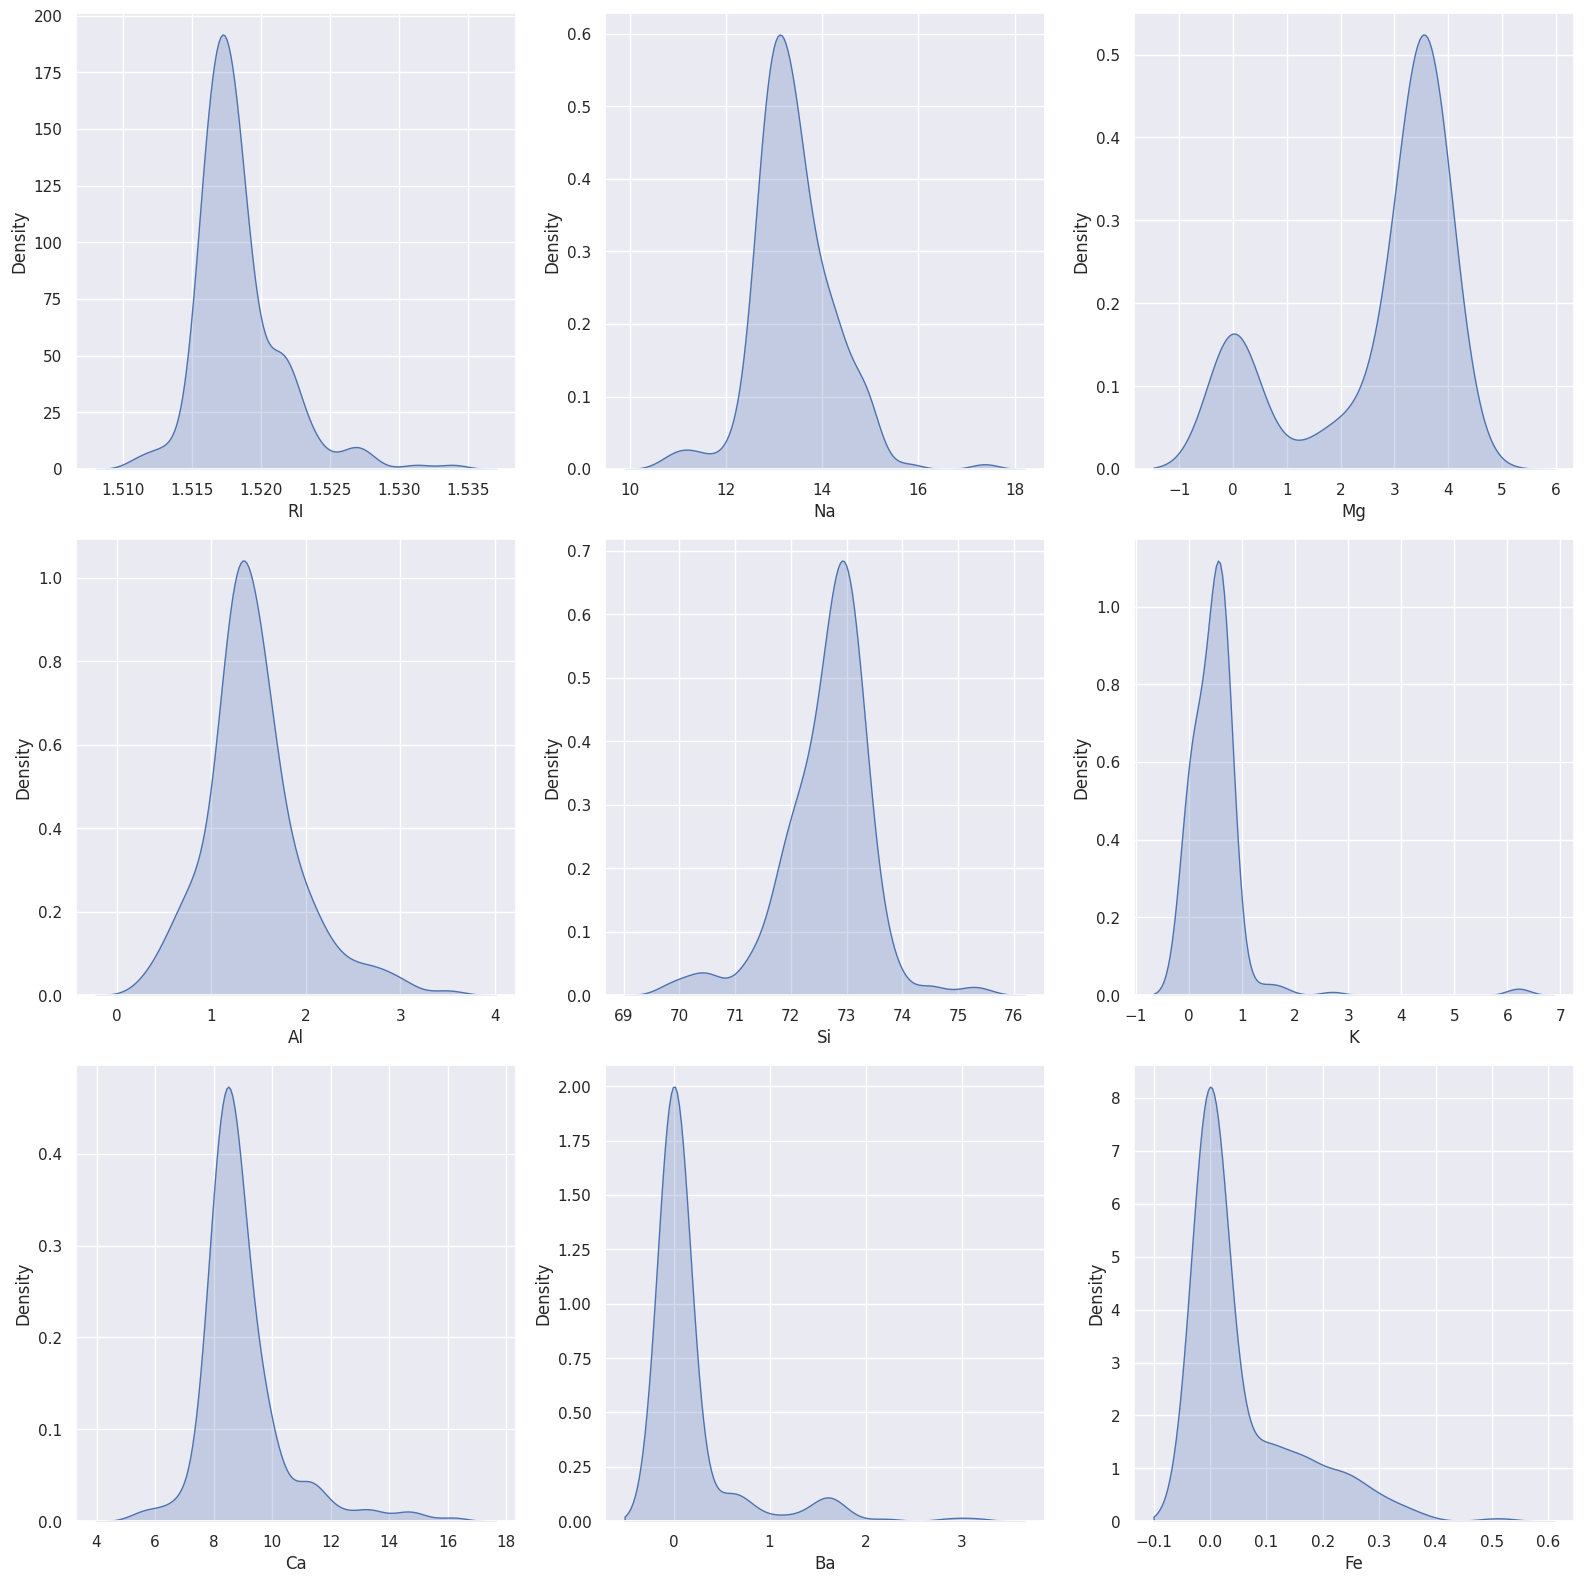

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))

sns.kdeplot(data=glass, x="RI", ax=axes[0, 0], fill=True)
sns.kdeplot(data=glass, x="Na", ax=axes[0, 1], fill=True)
sns.kdeplot(data=glass, x="Mg", ax=axes[0, 2], fill=True)
sns.kdeplot(data=glass, x="Al", ax=axes[1, 0], fill=True)
sns.kdeplot(data=glass, x="Si", ax=axes[1, 1], fill=True)
sns.kdeplot(data=glass, x="K", ax=axes[1, 2], fill=True)
sns.kdeplot(data=glass, x="Ca", ax=axes[2, 0], fill=True)
sns.kdeplot(data=glass, x="Ba", ax=axes[2, 1], fill=True)
sns.kdeplot(data=glass, x="Fe", ax=axes[2, 2], fill=True)

plt.tight_layout()
plt.show()